In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.sample(5)

,Category,Message
4605,ham,THANX 4 PUTTIN DA FONE DOWN ON ME!!
4306,ham,Yo come over carlos will be here soon
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?
2885,ham,Cbe is really good nowadays:)lot of shop and s...
1171,ham,"Yeah, we can probably swing by once my roommat..."


In [4]:
df.shape

(5572, 2)

In [5]:
# 1. Data cleaning 
# 2. EDA ( Exportory data analysis)
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
#7. Website
#8. Deployment


# 1. Data Cleaning 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()

encoder.fit_transform(df['Category'])

array([0, 0, 1, ..., 0, 0, 0])

In [9]:
df['Category'] = encoder.fit_transform(df['Category'])

In [10]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values 
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
#check for duplicate value
df.duplicated().sum()

415

In [13]:
#remove duplicate
df =df.drop_duplicates(keep ='first')

In [14]:
df.duplicated().sum()

0

In [15]:
#remove duplicate
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5157, 2)

# EDA ( EXPORATORY DATA ANALYSIS)

In [18]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# 0 = Ham
# 1= spam


df['Category'].value_counts()



Category
0    4516
1     641
Name: count, dtype: int64

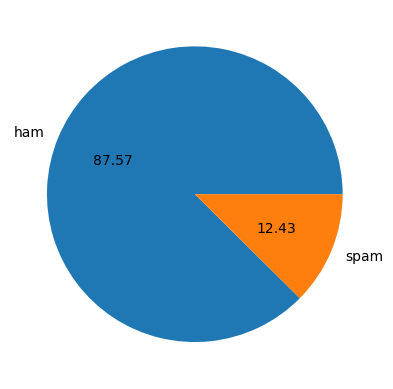

In [20]:
#for pie chart

import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced


In [22]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from nltk.tokenize import word_tokenize
import nltk.data
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tuf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tuf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['Message'].apply(len)

In [27]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['Category'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['Category'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [35]:
# Histogram plot

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

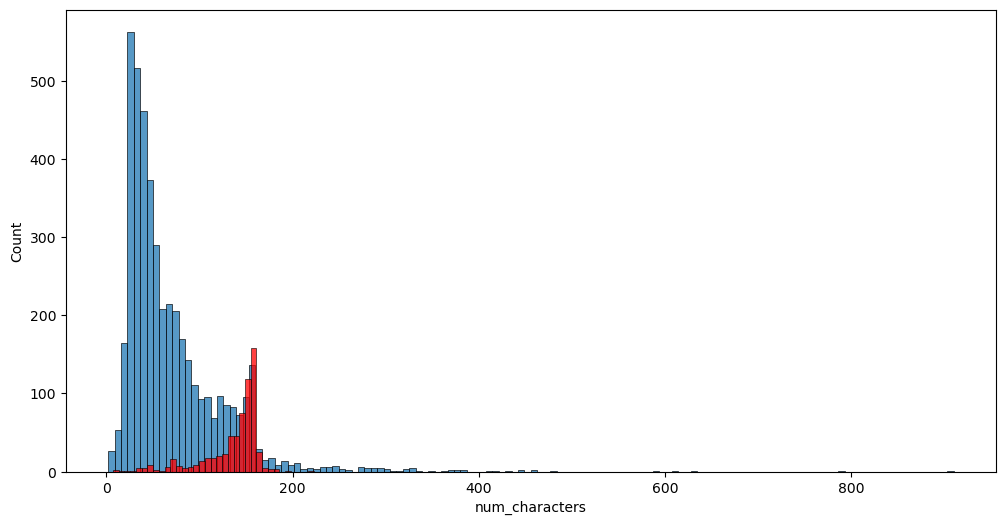

In [36]:
plt.figure(figsize=(12,6))
sns.histplot (df[df['Category']==0]['num_characters'])
sns.histplot (df[df['Category']==1]['num_characters'],color='red')

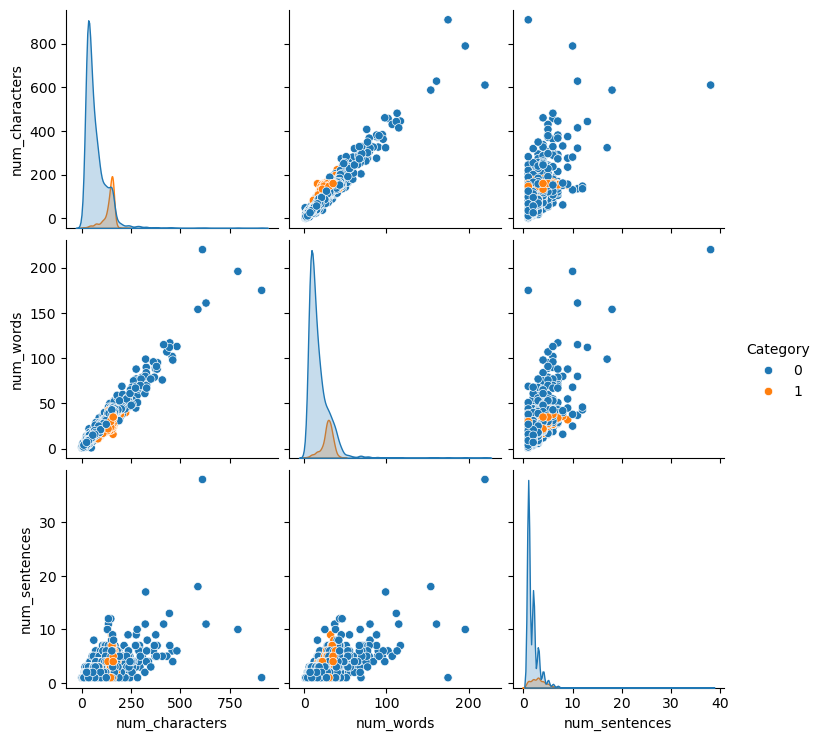

In [37]:
# relationship Betweeen the Diffrent columns

sns.pairplot(df,hue='Category')

In [38]:
# correlation coeficient of data (karlpearson coefficient)
# showing with the help of  heat map


In [39]:
def transform_Message(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y= []
    for i in Message:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear
    for i in Message:
        y.append(ps.stem(i))

    
    return " " .join(y)





In [40]:
df['Message'] [200]

'Found it, ENC  &lt;#&gt; , where you at?'

In [41]:
 # Stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing' )

'danc'

In [42]:
# word tokenize as well as removing special character

transform_Message('Hi How Are You %%% eg')

'hi how are you eg hi how are you % % % eg'

In [43]:
 df['transformed_Message']=df['Message'].apply(transform_Message)

In [44]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar ... joke wif u ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goes to usf he lives around ...


In [45]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [46]:
pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: C:\Users\Tuf\AppData\Roaming\Python\Python312\site-packages
Requires: matplotlib, numpy, pillow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [47]:
import sys
!{sys.executable} -m pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

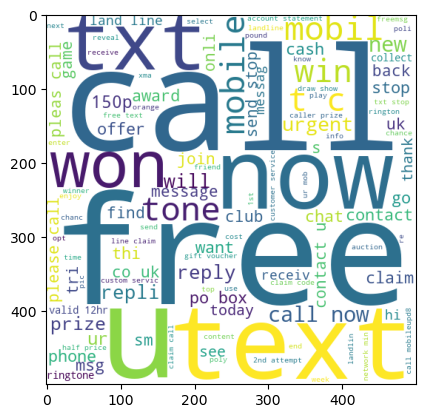

In [49]:
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_Message'].str.cat(sep=" "))
plt.imshow(spam_wc)

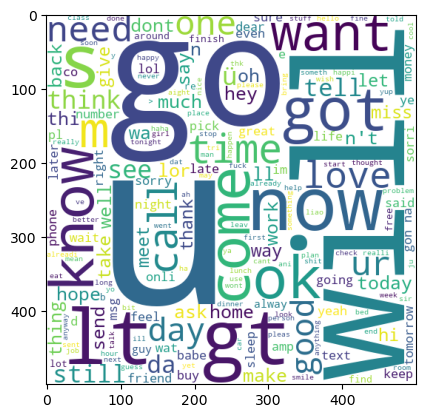

In [50]:
spam_wc = wc.generate(df[df['Category'] == 0]['transformed_Message'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [51]:
# top 30 from ham and spam


spam_corpus =[]
for msg in df[df['Category'] ==1]['transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

31871

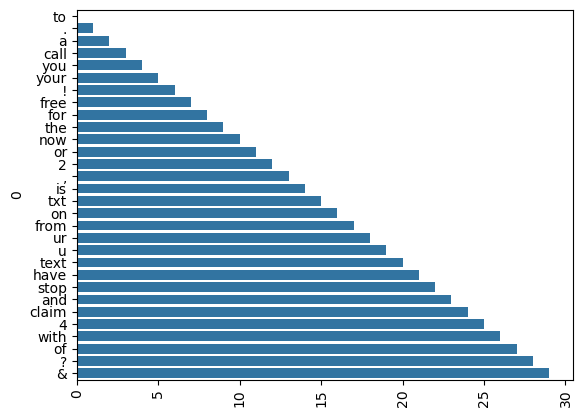

In [53]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]  )
plt.xticks(rotation='vertical')
plt.show()

In [54]:
  # for ham
ham_corpus =[]
for msg in df[df['Category'] == 0]['transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [55]:
len(ham_corpus)

141518

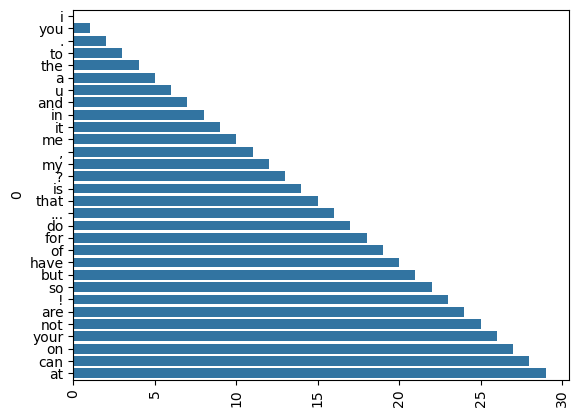

In [56]:

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0] )
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar ... joke wif u ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goes to usf he lives around ...


# Model Building (using Naive Baye's)

In [58]:
# text vectorization
# using bag of words as well as Tfidf

In [152]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [153]:
X = tfidf.fit_transform(df['transformed_Message']).toarray()

In [154]:
X.shape

(5157, 3000)

In [155]:
y = df['Category'].values

In [156]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [158]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [159]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [160]:
# gaussian naive bayes checking

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.875968992248062
[[797 108]
 [ 20 107]]
0.49767441860465117


In [161]:
# multinomial naive bayes checking

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738372093023255
[[905   0]
 [ 27 100]]
1.0


In [162]:
# bernoullis naive bayes checking

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874031007751938
[[904   1]
 [ 12 115]]
0.9913793103448276


In [163]:
# from above Testinng  we choose mulltinomial NB because precision score is good  using  (tfidf)
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [164]:
# cheching and compairing accuracy and precision scorer with other machine learning algoriths
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier




In [165]:
svc = SVC (kernel='sigmoid',gamma = 1.0)
knc =  KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear' , penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50 , random_state=2)
abc = AdaBoostClassifier(algorithm='SAMME')
etc = ExtraTreesClassifier(n_estimators = 50 , random_state=2)
gbdt= GradientBoostingClassifier(n_estimators = 50 , random_state=2)
xgb =  XGBClassifier(n_estimators = 50 , random_state=2)


In [166]:
# making dictionary (clfs) where inserting in keys algorith values:

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}


In [167]:
from sklearn.metrics import accuracy_score, precision_score


def train_classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [168]:
train_classifier(svc , X_train, y_train, X_test,y_test)

(0.9796511627906976, 0.9732142857142857)

In [169]:
# Change the name of your list variable
accuracy_scores =[]
precision_scores = []  # the plural "scores" to avoid the conflict

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("for ", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    # If you want to store the scores in your list
    precision_scores.append(current_precision)
    accuracy_scores.append(current_accuracy)



 

for  SVC
Accuracy - 0.9796511627906976
Precision - 0.9732142857142857
for  KN
Accuracy - 0.9127906976744186
Precision - 1.0
for  NB
Accuracy - 0.9738372093023255
Precision - 1.0
for  DT
Accuracy - 0.9467054263565892
Precision - 0.8829787234042553
for  LR
Accuracy - 0.9631782945736435
Precision - 0.9405940594059405
for  RF
Accuracy - 0.9796511627906976
Precision - 1.0
for  AdaBoost
Accuracy - 0.9428294573643411
Precision - 0.8777777777777778
for  ETC
Accuracy - 0.9815891472868217
Precision - 0.990909090909091
for  GBDT
Accuracy - 0.9544573643410853
Precision - 1.0
for  xgb
Accuracy - 0.9777131782945736
Precision - 0.9905660377358491


In [170]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy' : accuracy_scores, 'Precision':precision_scores})

In [171]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.979651,0.973214
1,KN,0.912791,1.000000
2,NB,0.973837,1.000000
3,DT,0.946705,0.882979
4,LR,0.963178,0.940594
5,RF,0.979651,1.000000
6,AdaBoost,0.942829,0.877778
7,ETC,0.981589,0.990909
8,GBDT,0.954457,1.000000
9,xgb,0.977713,0.990566


In [172]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [173]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.979651
1,KN,Accuracy,0.912791
2,NB,Accuracy,0.973837
3,DT,Accuracy,0.946705
4,LR,Accuracy,0.963178
5,RF,Accuracy,0.979651
6,AdaBoost,Accuracy,0.942829
7,ETC,Accuracy,0.981589
8,GBDT,Accuracy,0.954457
9,xgb,Accuracy,0.977713


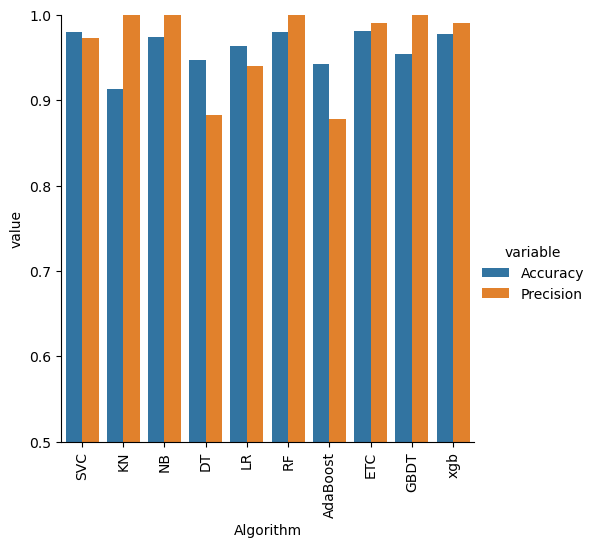

In [174]:
sns.catplot(x='Algorithm', y='value',
            hue='variable' , data=performance_df1, kind='bar' , height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [175]:
# model Improve 
#1. change the max_features parameter of Tfidf


In [176]:
temp_df=pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy_max_ft_3000' : accuracy_scores, 'Precision_max_ft_3000':precision_scores})

In [177]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.979651,0.973214,0.979651,0.973214
1,KN,0.912791,1.000000,0.912791,1.000000
2,NB,0.973837,1.000000,0.973837,1.000000
3,DT,0.946705,0.882979,0.946705,0.882979
4,LR,0.963178,0.940594,0.963178,0.940594
5,RF,0.979651,1.000000,0.979651,1.000000
6,AdaBoost,0.942829,0.877778,0.942829,0.877778
7,ETC,0.981589,0.990909,0.981589,0.990909
8,GBDT,0.954457,1.000000,0.954457,1.000000
9,xgb,0.977713,0.990566,0.977713,0.990566


In [178]:
import pickle
pickle.dump (tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))